In [1]:
import pandas as pd
import numpy as np
import itertools    
import matplotlib.pyplot as plt
import time
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,scale,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('IPM Jatim 2017.xlsx')
df.head()

,Daerah,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka,IPM
0,Pacitan,19.91,48.85,1,89.57,75.77,15.42,4.98,4.98,0.85,66.51
1,Ponorogo,22.85,42.08,5,95.02,79.88,11.39,5.10,5.10,3.76,69.26
2,Trenggalek,18.59,45.08,1,95.40,74.40,12.96,5.02,5.02,3.48,68.10
3,Tulungagung,19.18,40.48,11,96.97,80.93,8.04,5.08,5.08,2.27,71.24
4,Blitar,20.84,40.39,6,92.21,65.22,9.80,5.07,5.07,2.99,69.33


In [3]:
print("Number of null values:", df.isnull().sum())

Number of null values: Daerah                  0
AKB                     0
Keluhan Kesehatan       0
Sarana Kesehatan        0
Angka Melek Huruf       0
APS-SMA                 0
Persentase Miskin       0
PDRB                    0
Pertumbuhan Ekonomi     0
Pengangguran Terbuka    0
IPM                     0
dtype: int64


In [4]:
print("Dimension of the original data:", df.shape)

df_clean = df.dropna().drop(['Daerah'], axis=1)
print("Dimension of modified data :", df_clean.shape)


Dimension of the original data: (38, 11)
Dimension of modified data : (38, 10)


In [5]:
kw = df_clean.copy()

In [6]:
corr_matrix = kw.corr()
corr_matrix

,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka,IPM
AKB,1.000000,-0.069423,-0.253502,-0.718054,-0.736358,0.642089,-0.266750,-0.267025,-0.231348,-0.732643
Keluhan Kesehatan,-0.069423,1.000000,-0.092692,0.156759,0.005683,-0.094387,0.086141,0.085580,-0.055550,0.200216
Sarana Kesehatan,-0.253502,-0.092692,1.000000,0.394193,0.122258,-0.382682,0.273267,0.273738,0.436454,0.468447
Angka Melek Huruf,-0.718054,0.156759,0.394193,1.000000,0.602393,-0.844428,0.327688,0.328616,0.481280,0.839223
APS-SMA,-0.736358,0.005683,0.122258,0.602393,1.000000,-0.562592,0.364971,0.365528,0.217915,0.703475
Persentase Miskin,0.642089,-0.094387,-0.382682,-0.844428,-0.562592,1.000000,-0.403823,-0.405258,-0.371376,-0.833164
PDRB,-0.266750,0.086141,0.273267,0.327688,0.364971,-0.403823,1.000000,0.999989,0.202090,0.344938
Pertumbuhan Ekonomi,-0.267025,0.085580,0.273738,0.328616,0.365528,-0.405258,0.999989,1.000000,0.202116,0.345676
Pengangguran Terbuka,-0.231348,-0.055550,0.436454,0.481280,0.217915,-0.371376,0.202090,0.202116,1.000000,0.507358
IPM,-0.732643,0.200216,0.468447,0.839223,0.703475,-0.833164,0.344938,0.345676,0.507358,1.000000


<Axes: >

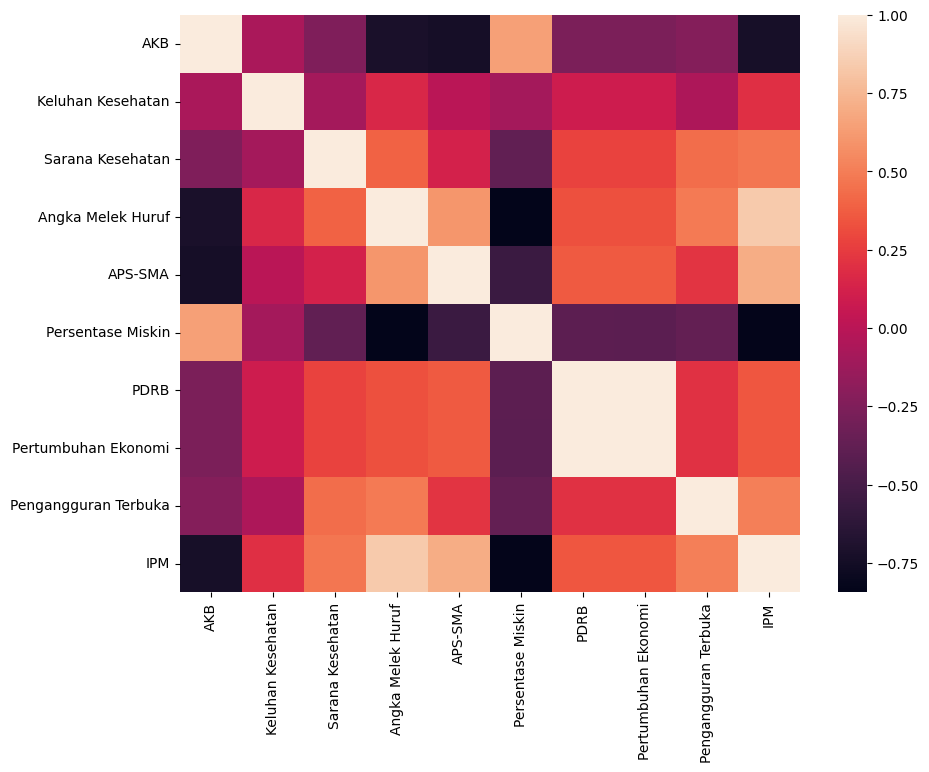

In [7]:
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)

Text(0.5, 1.0, 'Correlation Plot')

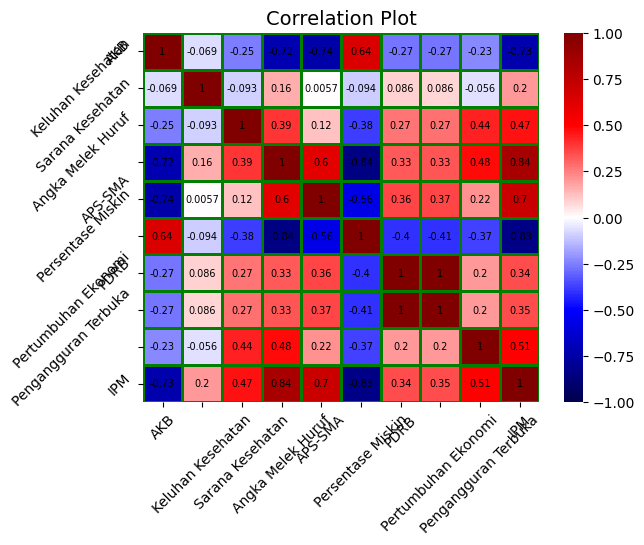

In [8]:
sns.heatmap(corr_matrix, 
            cmap = 'seismic', 
            linewidth = 0.75,
            linecolor = 'green',
            cbar = True,
            vmin = -1,
            vmax = 1,
            annot = True,
            annot_kws = {'size': 7,'color':'black'})
plt.tick_params(labelsize = 10, rotation = 45)
plt.title('Correlation Plot',size = 14)

In [9]:
y = df_clean['IPM']  # Target variable
X = df_clean.drop(['IPM'], axis=1)  # Feature matrix
X.head()

,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka
0,19.91,48.85,1,89.57,75.77,15.42,4.98,4.98,0.85
1,22.85,42.08,5,95.02,79.88,11.39,5.10,5.10,3.76
2,18.59,45.08,1,95.40,74.40,12.96,5.02,5.02,3.48
3,19.18,40.48,11,96.97,80.93,8.04,5.08,5.08,2.27
4,20.84,40.39,6,92.21,65.22,9.80,5.07,5.07,2.99


In [10]:
def processsubset(featureset):
    model = sm.OLS(y,X[list(featureset)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(featureset)])-y)**2).sum()
    return {"model":regr,"RSS":RSS}

In [11]:
def getbest(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns,k):
        results.append(processsubset(combo))
    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed", models.shape[0], k, "predictors in", toc-tic, "seconds")
   
    return best_model

In [12]:
model_best = pd.DataFrame(columns = ["RSS","model"])

tic = time.time()
for i in range(1,10):
    model_best.loc[i] = getbest(i)
toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 1 predictors in 0.013864994049072266 seconds
Processed 36 2 predictors in 0.050025224685668945 seconds
Processed 84 3 predictors in 0.11149740219116211 seconds
Processed 126 4 predictors in 0.16687631607055664 seconds
Processed 126 5 predictors in 0.16768622398376465 seconds
Processed 84 6 predictors in 0.12296867370605469 seconds
Processed 36 7 predictors in 0.05723929405212402 seconds
Processed 9 8 predictors in 0.01552128791809082 seconds
Processed 1 9 predictors in 0.0 seconds
Total elapsed time : 0.7282834053039551 seconds


In [13]:
model_best

,RSS,model
1,330.54743,<statsmodels.regression.linear_model.Regressio...
2,249.740821,<statsmodels.regression.linear_model.Regressio...
3,206.548128,<statsmodels.regression.linear_model.Regressio...
4,186.863428,<statsmodels.regression.linear_model.Regressio...
5,175.028559,<statsmodels.regression.linear_model.Regressio...
6,166.604749,<statsmodels.regression.linear_model.Regressio...
7,164.722151,<statsmodels.regression.linear_model.Regressio...
8,162.735867,<statsmodels.regression.linear_model.Regressio...
9,162.363416,<statsmodels.regression.linear_model.Regressio...


In [14]:
print(model_best.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.361e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                    1.49e-52
Time:                        14:06:12   Log-Likelihood:                         -89.694
No. Observations:                  38   AIC:                                      183.4
Df Residuals:                      36   BIC:                                      186.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [15]:
print(model_best.loc[2,"model"].rsquared)

0.9986794748400373


In [16]:
model_best.apply(lambda row:row[1].rsquared, axis=1)

C:\Users\ilham\AppData\Local\Temp\ipykernel_8616\3471709294.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_best.apply(lambda row:row[1].rsquared, axis=1)


1    0.998252
2    0.998679
3    0.998908
4    0.999012
5    0.999075
6    0.999119
7    0.999129
8    0.999140
9    0.999141
dtype: float64

C:\Users\ilham\AppData\Local\Temp\ipykernel_8616\2708560098.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rsquared_adj = model_best.apply(lambda row: row[1].rsquared_adj, axis=1)
C:\Users\ilham\AppData\Local\Temp\ipykernel_8616\2708560098.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aic = model_best.apply(lambda row: row[1].aic, axis=1)
C:\Users\ilham\AppData\Local\Temp\ipykernel_8616\2708560098.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

Text(0, 0.5, 'BIC')

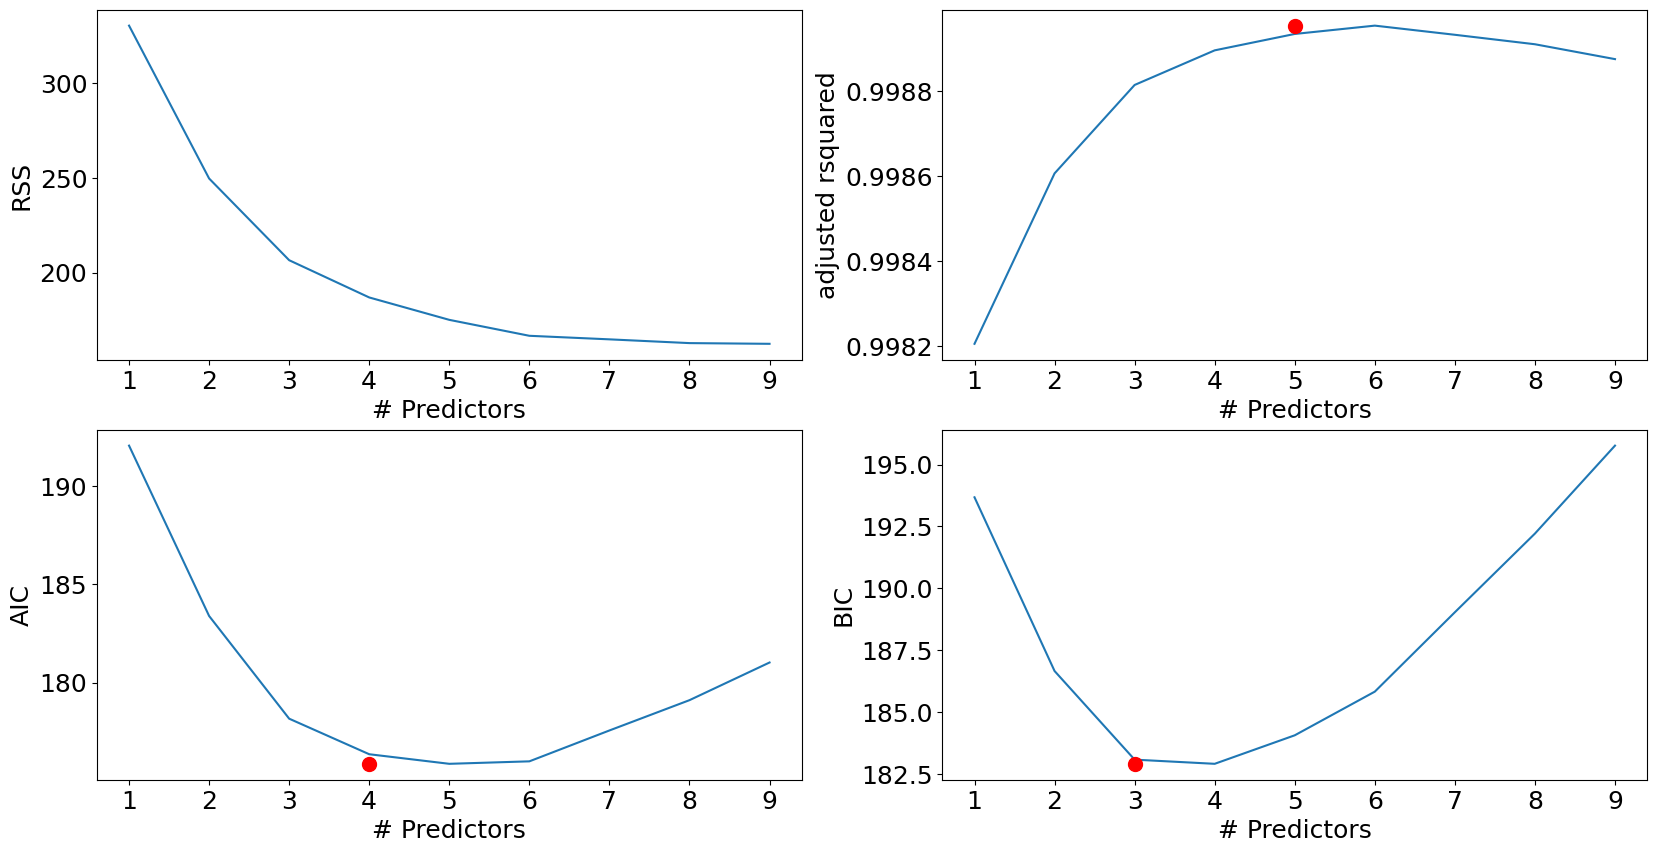

In [17]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18,'lines.markersize':10})

plt.subplot(2,2,1)

plt.plot(model_best["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")

rsquared_adj = model_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2,2,2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('adjusted rsquared')

aic = model_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2,2,3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('AIC')

bic = model_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2,2,4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('BIC')



# FORWARD STEPWISE

In [18]:
def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processsubset(predictors+[p]))

    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()

    print("Processed", models.shape[0], "predictors in", toc-tic, "seconds")

    return best_model

In [19]:
models_fwd = pd.DataFrame(columns = ["RSS","model"])

tic = time.time()
predictors = []

for i in range(1, len(X.columns)+1):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 predictors in 0.012497901916503906 seconds
Processed 8 predictors in 0.005716085433959961 seconds
Processed 7 predictors in 0.005337238311767578 seconds
Processed 6 predictors in 0.01335763931274414 seconds
Processed 5 predictors in 0.0071794986724853516 seconds
Processed 4 predictors in 0.0062220096588134766 seconds
Processed 3 predictors in 0.0 seconds
Processed 2 predictors in 0.0 seconds
Processed 1 predictors in 0.009941577911376953 seconds
Total elapsed time : 0.07007813453674316 seconds


In [20]:
print(models_fwd.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.361e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                    1.49e-52
Time:                        14:06:13   Log-Likelihood:                         -89.694
No. Observations:                  38   AIC:                                      183.4
Df Residuals:                      36   BIC:                                      186.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [21]:
print(model_best.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.361e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                    1.49e-52
Time:                        14:06:13   Log-Likelihood:                         -89.694
No. Observations:                  38   AIC:                                      183.4
Df Residuals:                      36   BIC:                                      186.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# BACKWARD


In [22]:
def backward(predictors):
    tic = time.time()

    results = []

    for combo in itertools.combinations(predictors,len(predictors)-1):
        results.append(processsubset(combo))
    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print('Processed',models.shape[0],'models on',len(predictors)-1, 'predictors in',toc-tic,'seconds')

    return best_model

In [23]:
models_bwd = pd.DataFrame(columns = ["RSS","model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]['model'].model.exog_names
toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 models on 8 predictors in 0.0357670783996582 seconds
Processed 8 models on 7 predictors in 0.017044544219970703 seconds
Processed 7 models on 6 predictors in 0.013480424880981445 seconds
Processed 6 models on 5 predictors in 0.00934743881225586 seconds
Processed 5 models on 4 predictors in 0.006575107574462891 seconds
Processed 4 models on 3 predictors in 0.003383636474609375 seconds
Processed 3 models on 2 predictors in 0.004933595657348633 seconds
Processed 2 models on 1 predictors in 0.0051534175872802734 seconds
Total elapsed time : 0.12034177780151367 seconds


In [24]:
print("BEST SUBSET")
print(model_best.loc[7,'model'].params)

BEST SUBSET
Keluhan Kesehatan       0.136434
Sarana Kesehatan        0.123981
Angka Melek Huruf       0.550377
APS-SMA                 0.179408
Persentase Miskin      -0.107761
Pertumbuhan Ekonomi    -0.242013
Pengangguran Terbuka    0.443135
dtype: float64


In [25]:
print("FORWARD SELECTION")
print(models_fwd.loc[7,'model'].params)

FORWARD SELECTION
Angka Melek Huruf       0.550377
APS-SMA                 0.179408
Sarana Kesehatan        0.123981
Keluhan Kesehatan       0.136434
Pengangguran Terbuka    0.443135
Persentase Miskin      -0.107761
Pertumbuhan Ekonomi    -0.242013
dtype: float64


In [26]:
print("BACKWARD SELECTION")
print(models_bwd.loc[7,'model'].params)

BACKWARD SELECTION
Keluhan Kesehatan       0.136434
Sarana Kesehatan        0.123981
Angka Melek Huruf       0.550377
APS-SMA                 0.179408
Persentase Miskin      -0.107761
Pertumbuhan Ekonomi    -0.242013
Pengangguran Terbuka    0.443135
dtype: float64


# RIDGE REGRESSION


In [27]:
df = pd.read_excel('IPM JATIM 2017.xlsx').dropna().drop('Daerah', axis = 1)

In [28]:
y = df['IPM']
X = df.drop(['IPM'], axis = 1).astype('float64')

In [29]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisasi fitur

In [31]:
ridge = Ridge()  
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_scaled, y)  # Gunakan data yang sudah dinormalisasi
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 9)

Text(0, 0.5, 'weights')

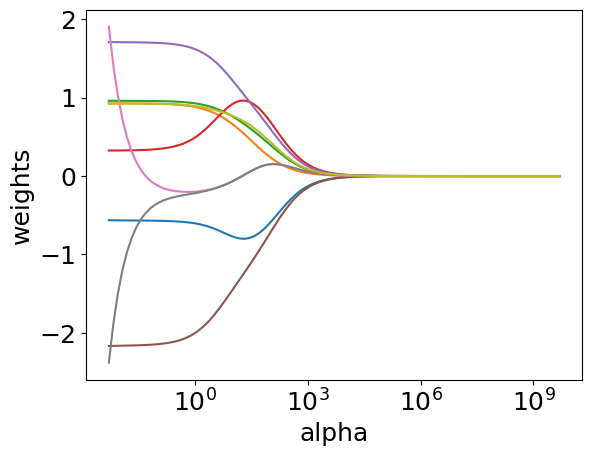

In [32]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [33]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=1)

# Normalisasi hanya berdasarkan X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Gunakan transform() untuk menjaga konsistensi skala

In [34]:
ridge2 = Ridge(alpha=4)  # Hapus normalize=True
ridge2.fit(X_train_scaled, y_train)  # Fit model dengan data yang sudah dinormalisasi
pred2 = ridge2.predict(X_test_scaled)  # Prediksi dengan data test yang juga dinormalisasi

print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

AKB                    -0.408892
Keluhan Kesehatan       0.638207
Sarana Kesehatan        1.277483
Angka Melek Huruf       0.886642
APS-SMA                 0.920561
Persentase Miskin      -0.406872
PDRB                    0.373896
Pertumbuhan Ekonomi     0.376209
Pengangguran Terbuka    0.253512
dtype: float64
13.994737728463738


In [35]:
ridge3 = Ridge(alpha=10**10)  # Hapus normalize=True
ridge3.fit(X_train_scaled, y_train)  # Fit model dengan data yang sudah dinormalisasi
pred3 = ridge3.predict(X_test_scaled)  # Prediksi dengan data test yang juga dinormalisasi

# Print koefisien regresi
print(pd.Series(ridge3.coef_, index=X.columns))

# Hitung Mean Squared Error (MSE)
print(mean_squared_error(y_test, pred3))

AKB                    -4.637021e-09
Keluhan Kesehatan       1.012445e-09
Sarana Kesehatan        4.416087e-09
Angka Melek Huruf       5.751173e-09
APS-SMA                 4.404921e-09
Persentase Miskin      -5.177591e-09
PDRB                    5.558561e-09
Pertumbuhan Ekonomi     5.555206e-09
Pengangguran Terbuka    3.048761e-09
dtype: float64
39.40211978929885


In [36]:
ridge2 = Ridge(alpha=4)  # Hapus normalize=True
ridge2.fit(X_train_scaled, y_train)  # Fit model dengan data yang sudah dinormalisasi
pred = ridge2.predict(X_test_scaled)  # Prediksi dengan data test yang juga dinormalisasi

print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

AKB                    -0.408892
Keluhan Kesehatan       0.638207
Sarana Kesehatan        1.277483
Angka Melek Huruf       0.886642
APS-SMA                 0.920561
Persentase Miskin      -0.406872
PDRB                    0.373896
Pertumbuhan Ekonomi     0.376209
Pengangguran Terbuka    0.253512
dtype: float64
13.994737728463738


In [37]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train)

# Cek alpha terbaik
ridgecv.alpha_

np.float64(16.372745814388658)

In [38]:
ridge4 = Ridge(alpha=ridgecv.alpha_)  # Hapus normalize=True
ridge4.fit(X_train_scaled, y_train)

# Hitung MSE pada data test
mse = mean_squared_error(y_test, ridge4.predict(X_test_scaled))
print("Mean Squared Error:", mse)

Mean Squared Error: 17.46811708121555


In [39]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AKB                    -0.048566
Keluhan Kesehatan       0.134642
Sarana Kesehatan        0.134976
Angka Melek Huruf       0.123686
APS-SMA                 0.163130
Persentase Miskin      -0.422114
PDRB                   -0.169248
Pertumbuhan Ekonomi    -0.170440
Pengangguran Terbuka    0.513711
dtype: float64

# LASSO REGRESSION

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
# Lasso Regression tanpa normalize=True
lasso = Lasso(max_iter=10000)

coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'weights')

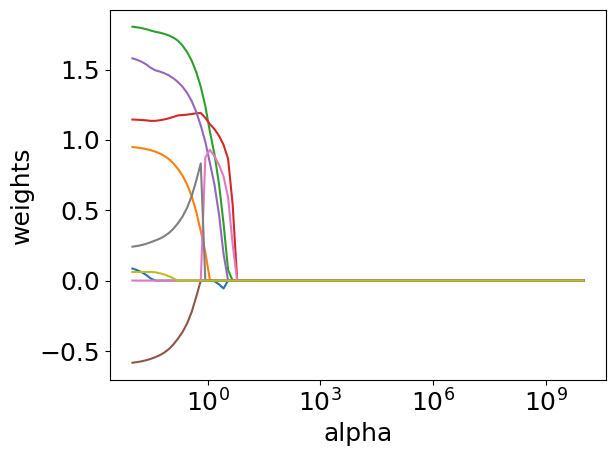

In [42]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# LASSO CV

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train_scaled, y_train)

# Gunakan alpha terbaik dari LassoCV
lasso = Lasso(alpha=lassocv.alpha_, max_iter=100000)
lasso.fit(X_train_scaled, y_train)

# Hitung MSE pada data test
mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))
print("Mean Squared Error:", mse)

Mean Squared Error: 17.346255606433004


In [45]:
pd.Series(lasso.coef_, index=X.columns)

AKB                    -0.000000
Keluhan Kesehatan       0.324440
Sarana Kesehatan        1.352677
Angka Melek Huruf       1.184651
APS-SMA                 1.081040
Persentase Miskin      -0.000000
PDRB                    0.000000
Pertumbuhan Ekonomi     0.839722
Pengangguran Terbuka    0.000000
dtype: float64